# Technical exercise - Give me some Credit



# Exploratory data analysis 

In [2]:
# Read in data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection


df=pd.read_csv("../Data/cs-training.csv")
testDf=pd.read_csv("../Data/cs-test.csv")

df=df.iloc[:,1:]

print("Length of training dataset is equal to",len(df))
print("Lenght of test dataset is equal to:",len(testDf))

#Test dataset doesn't have labels on it so just split train using 

df.head(10)


Length of training dataset is equal to 150000
Lenght of test dataset is equal to: 101503


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [47]:
df.info()
#Two variables with missing values - monthly income and number of dependents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SeriousDlqin2yrs                      150000 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64 
 2   age                                   150000 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64   
 4   DebtRatio                             150000 non-null  float64 
 5   MonthlyIncome                         120269 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64   
 7   NumberOfTimes90DaysLate               150000 non-null  int64   
 8   NumberRealEstateLoansOrLines          150000 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64   
 10  NumberOfDependents                    146076 non-null  f

<AxesSubplot:ylabel='SeriousDlqin2yrs'>

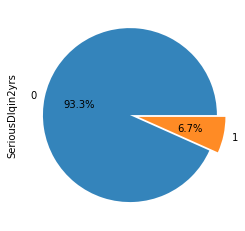

In [2]:
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',wedgeprops={'alpha':0.9})


10


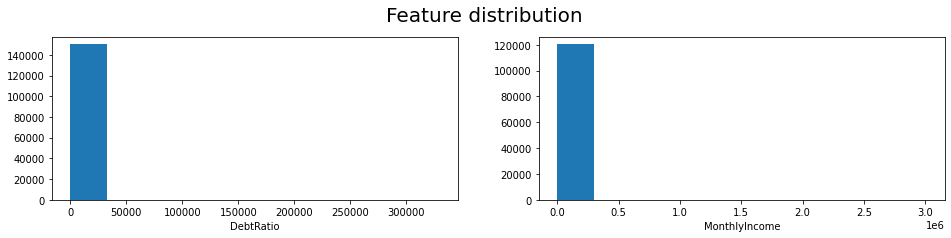

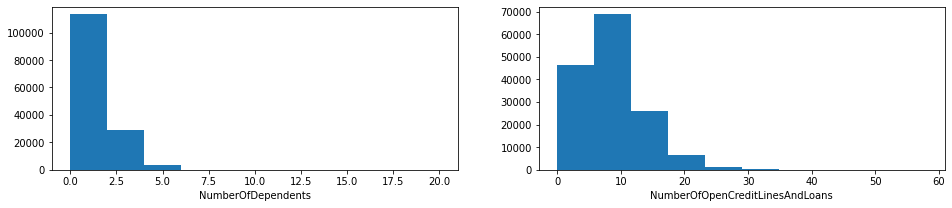

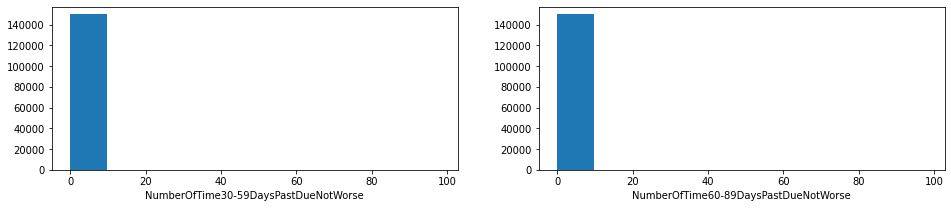

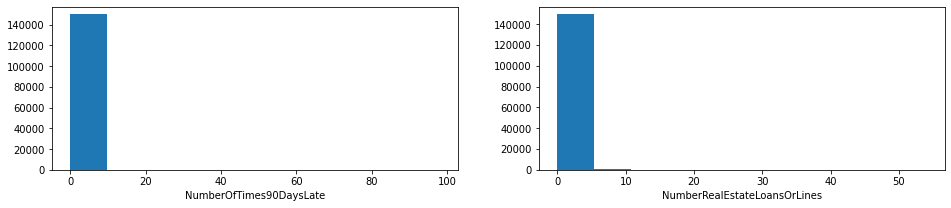

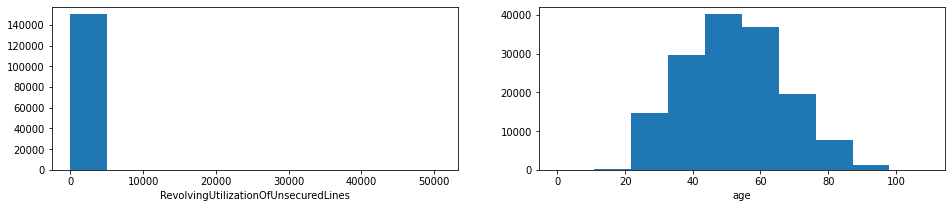

In [3]:
## Distribution of the numerical features

cont_features = sorted([f for f in df.columns if f not in ['SeriousDlqin2yrs']])
print(len(cont_features))
# print(cont_features)
ncols = 2
for i, f in enumerate(cont_features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Feature distribution', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(df[f], bins=10)
    plt.xlabel(f)
plt.show()

## Significant amount of white space are usually associated with extreme outliers 
## Potential action is needed to account for these customers 

C:\Users\adamt\AppData\Local\Temp\ipykernel_17604\295795404.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


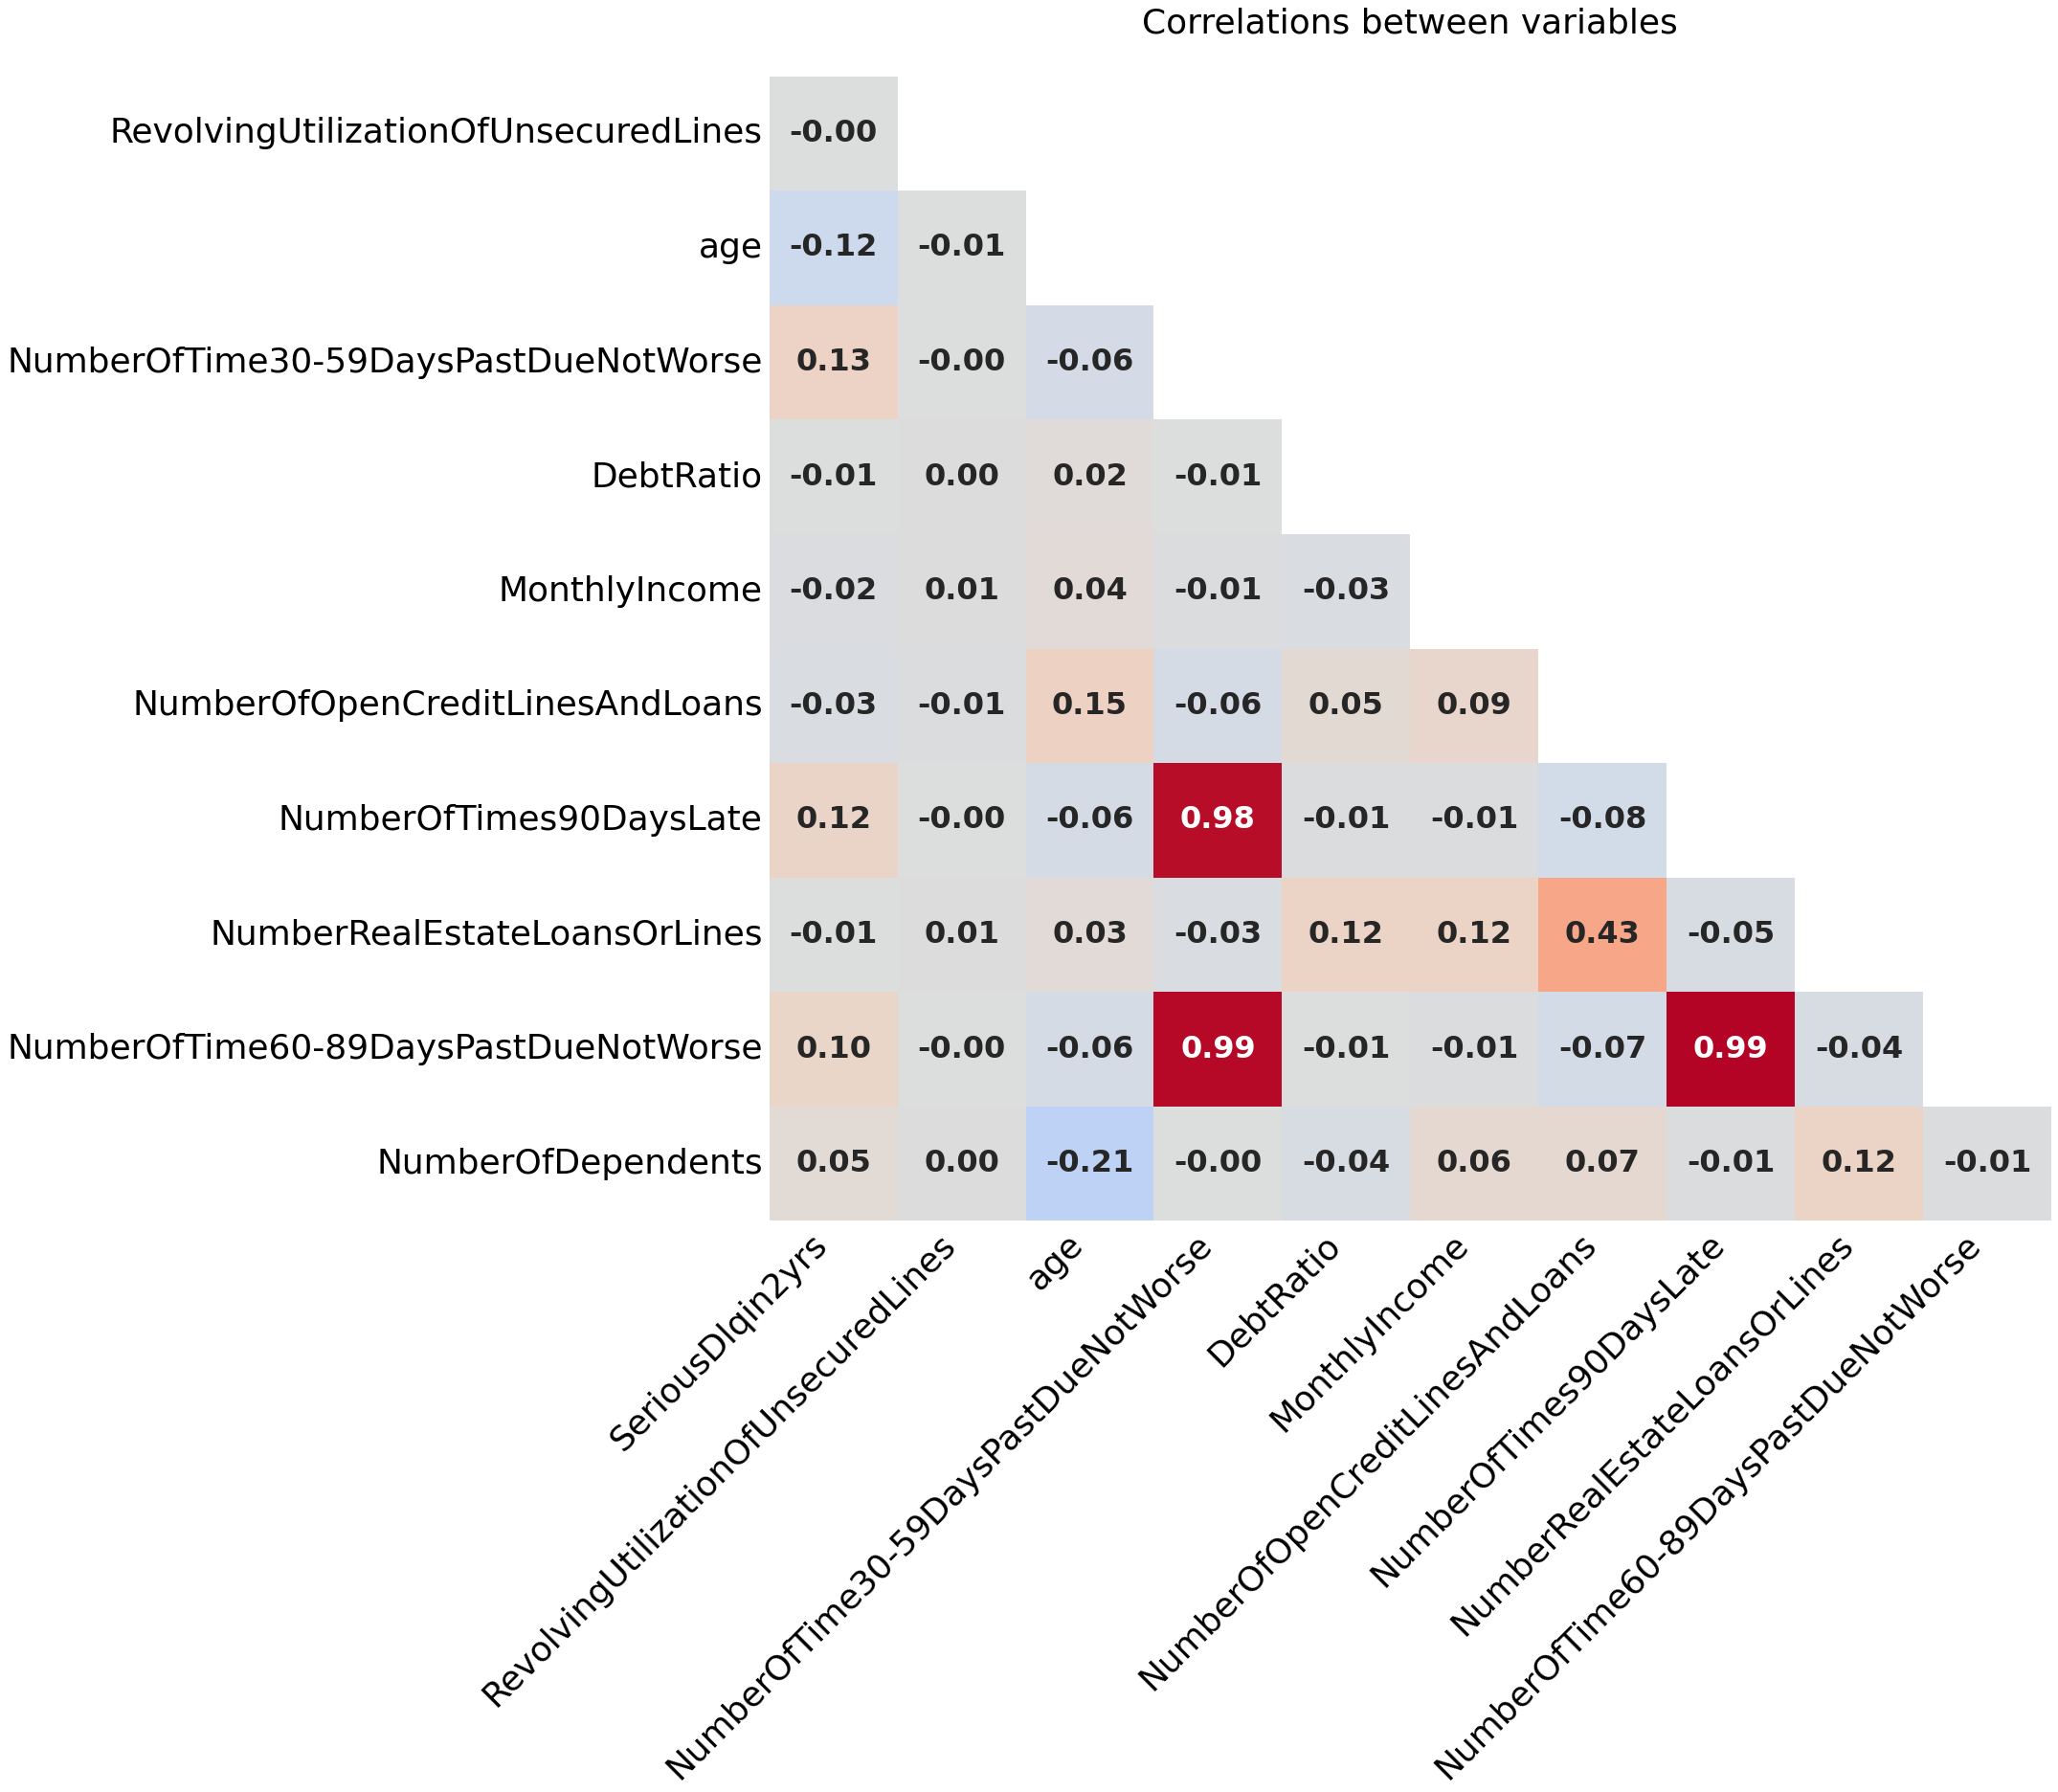

In [4]:
corr=df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(24,22))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':32,'fontweight':'bold'}, cbar=False,xticklabels=True, yticklabels=True)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=36)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=36)
plt.title('Correlations between variables\n', fontsize=36)
fig.show()

## Dealing with Outliers

We can see from the histogram, there are some significant outliers in our data. These are : 

- RevolvingUtilizationOfUnsecuredLines
- DebtRatio
- MonthlyIncome

- NumberOfTime30-59DaysPastDueNotWorse
- NumberOfTimes90DaysLate
- NumberOfTime60-89DaysPastDueNotWorse


In [6]:
print(df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts())
print(df['NumberOfTimes90DaysLate'].value_counts())
print(df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts())


# All of these variables have infeasible values of 96/98 in it - perhaps this is a special code, or simply an accounting error.

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
11         1
13         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
9          1
11         1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64


In [6]:
default_rate = df.groupby('NumberOfTime30-59DaysPastDueNotWorse')['SeriousDlqin2yrs'].mean()
default_rate2 = df.groupby('NumberOfTimes90DaysLate')['SeriousDlqin2yrs'].mean()
default_rate3 = df.groupby('NumberOfTime60-89DaysPastDueNotWorse')['SeriousDlqin2yrs'].mean()
print(default_rate3)

#Given that the default rates of these "96/98" are high, it is reasonable to assume that they are some sort of accounting errors and replace them with the max values 

df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] >=90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 13
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 11
df.loc[df['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 17

NumberOfTime60-89DaysPastDueNotWorse
0     0.050956
1     0.310068
2     0.501789
3     0.566038
4     0.619048
5     0.617647
6     0.750000
7     0.555556
8     0.500000
9     0.000000
11    1.000000
96    0.800000
98    0.541667
Name: SeriousDlqin2yrs, dtype: float64


c:\Users\adamt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


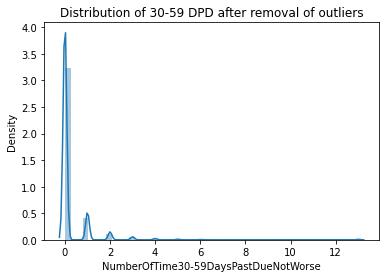

c:\Users\adamt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


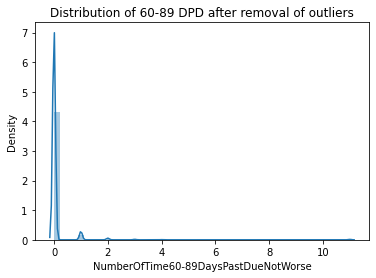

c:\Users\adamt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


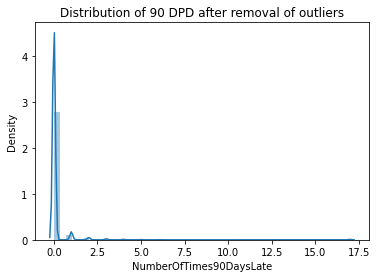

In [8]:
sns.distplot(df['NumberOfTime30-59DaysPastDueNotWorse'])
plt.title("Distribution of 30-59 DPD after removal of outliers")
plt.show()

sns.distplot(df['NumberOfTime60-89DaysPastDueNotWorse'])
plt.title("Distribution of 60-89 DPD after removal of outliers")
plt.show()

sns.distplot(df['NumberOfTimes90DaysLate'])
plt.title("Distribution of 90 DPD after removal of outliers")
plt.show()



In [9]:
# DebtRatio
# MonthlyIncome - reasonable for their to be high discrepancies of monthly income. Propose to do nothing as seems valid data  - apply a log transformation
print('Debt Ratio: \n',df['DebtRatio'].describe().apply(lambda x: format(x, 'f')))
print('Monthly Income: \n',df['MonthlyIncome'].describe().apply(lambda x: format(x, 'f')))


## It is clear that extremely high debt ratios are driven by low monthly incomes - this can produce extremely high levels of debt ratios

df['DebtRatio_log']=np.log(df['DebtRatio']+0.001)
df['MonthlyIncome_log']=np.log(df['MonthlyIncome']+0.001)

# RevolvingUtilizationOfUnsecuredLines 

Debt Ratio: 
 count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: object
Monthly Income: 
 count     120269.000000
mean        6670.221237
std        14384.674215
min            0.000000
25%         3400.000000
50%         5400.000000
75%         8249.000000
max      3008750.000000
Name: MonthlyIncome, dtype: object


c:\Users\adamt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


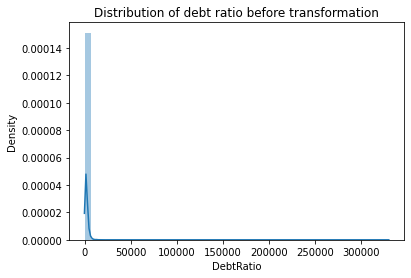

c:\Users\adamt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


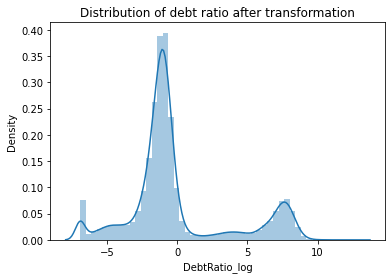

In [10]:
sns.distplot(df['DebtRatio'])
plt.title("Distribution of debt ratio before transformation")
plt.show()

sns.distplot(df['DebtRatio_log'])
plt.title("Distribution of debt ratio after transformation")
plt.show()

c:\Users\adamt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


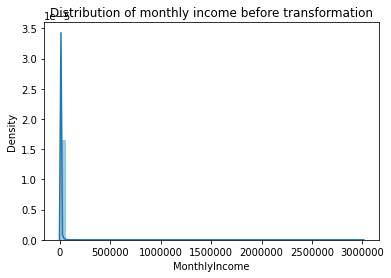

c:\Users\adamt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


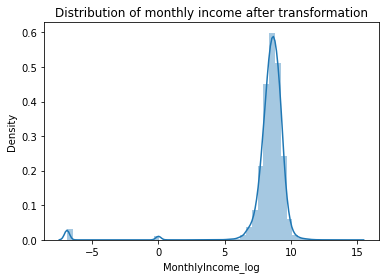

In [14]:
sns.distplot(df['MonthlyIncome'])
plt.title("Distribution of monthly income before transformation")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

sns.distplot(df['MonthlyIncome_log'])
plt.title("Distribution of monthly income after transformation")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [15]:
#Expect this to be around one - yet the mean is 6. Clear that there is some distortion caused by ridiculous figures at the far end. 
print('Revolving Utilisation: \n',df['RevolvingUtilizationOfUnsecuredLines'].describe().apply(lambda x: format(x, 'f')))


df[df['RevolvingUtilizationOfUnsecuredLines']>5].describe()

##254 rows where revolving utilisation is over 5  - as this is the unsecured balance divided by limit, seems either to be driven extremely low limits (perhaps 0), or 
#data error

# As the default rate of customeres where revolving utilisation is greater than 5 does not seem to be much different from average, it seems to suggest
#that this is more of a data driven error. Hence the decision will be made to drop these 254 rows from our final dataset.


df = df[df['RevolvingUtilizationOfUnsecuredLines']<=5]


Revolving Utilisation: 
 count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: object


## Dealing with missing values

There are two variables with missing values; MonthlyIncome and Number of Dependants. For number of dependants, it is reasonable to assume that if this field is missing, then there are no dependants. For MonthlyIncome, this can be somewhat questionable as to what to do - there are a few options such as filling in with the median value or setting monthly income to 0. However, not much information can be gained as to whether this is missing at random or missing for another reason - hence it would be unreasonable to infer too much. Our choice of modelling algorithm (XGboost) is well suited to handling missing values so the decision was made to keep the missing's within MonthlyIncome.


In [16]:
df['NumberOfDependents'].fillna(0, inplace = True)

## Feature engineering

Some basic feature engineering was done to create some binary flags/transformations of variables to aid the model building process.

MonthlyIncomePerPerson: Monthly Income divided by the number of dependents

MonthlyDebt: Monthly Income multiplied by the Debt Ratio

Retirement flag: when age over 65 and income is 0


In [17]:
df['MonthlyIncomePerPerson'] = df['MonthlyIncome']/(df['NumberOfDependents']+1)
df['MonthlyIncomePerPerson'].fillna(0, inplace=True)

df['MonthlyDebt'] = df['MonthlyIncome']*df['DebtRatio']
df['MonthlyDebt'].fillna(df['DebtRatio'],inplace=True)
df['MonthlyDebt'] = np.where(df['MonthlyDebt']==0, df['DebtRatio'],df['MonthlyDebt'])

df['isRetired'] = np.where((df['age'] > 65), 1, 0)



## Information values





In [49]:
from sklearn.tree import DecisionTreeClassifier
from ScorecardTools import calc_mivs,get_bins
import tqdm
from pandas.api.types import is_numeric_dtype

iv_dict = dict()

df['dummy_prob'] = 0.01


for col in tqdm.tqdm(df.drop(columns=['SeriousDlqin2yrs']).columns):
    
    try:
        if is_numeric_dtype(df[col]):
            tree = DecisionTreeClassifier(max_depth=3,criterion='gini',min_samples_leaf=100)
            X,y = df[[col]].fillna(-10e7),df['SeriousDlqin2yrs']
            tree.fit(X,y)
            binz = get_bins(tree)
        else:
            binz = df[col].fillna('missing').unique().tolist()
            
        # check bins for duplicate edges
        binz_new = list()
        for n,bin_edge in enumerate(binz):
            if n==0:
                binz_new.append(bin_edge)
            else:
                if binz[n]!=binz[n-1]:
                    binz_new.append(bin_edge)

        df_iv = df[[col,'SeriousDlqin2yrs','dummy_prob']].copy()
        df_iv[col] = df_iv[col].fillna(-10e7)
        iv_dict[col] = calc_mivs(df_iv,'SeriousDlqin2yrs','dummy_prob',col,binz_new)
        #print(binz)
    except:
        iv_dict[col] = [-99,-99,[]]

100%|██████████| 16/16 [00:02<00:00,  5.86it/s]


In [52]:

information_values=pd.DataFrame(iv_dict,index=['IV','MIV','bins']).T.sort_values(by=['IV'],ascending=False)
information_values.to_csv("information_values.csv")
information_values

df=df.drop(['dummy_prob','DebtRatio','MonthlyIncome'],axis=1)



,IV,MIV,bins
RevolvingUtilizationOfUnsecuredLines,1.16163,1.16163,"[-inf, -2.0, 0.13183673471212387, 0.3008972406..."
NumberOfTimes90DaysLate,0.876366,0.876366,"[-inf, -2.0, 0.5, 1.5, 2.5, inf]"
NumberOfTime30-59DaysPastDueNotWorse,0.754664,0.754664,"[-inf, -2.0, 0.5, 1.5, 3.5, inf]"
NumberOfTime60-89DaysPastDueNotWorse,0.598832,0.598832,"[-inf, -2.0, 0.5, 1.5, 2.5, inf]"
age,0.262246,0.262246,"[-inf, -2.0, 28.5, 36.5, 43.5, 55.5, 57.5, 62...."
isRetired,0.158869,0.158869,"[-inf, -2.0, 0.5, inf]"
MonthlyIncomePerPerson,0.117444,0.117444,"[-inf, -2.0, 0.5833333432674408, 106.099998474..."
NumberOfOpenCreditLinesAndLoans,0.10656,0.10656,"[-inf, -2.0, 0.5, 1.5, 2.5, 3.5, 13.5, inf]"
DebtRatio_log,0.092421,0.092421,"[-inf, -6.894921541213989, -4.054256439208984,..."
DebtRatio,0.089508,0.089508,"[-inf, -2.0, 1.2999999853491317e-05, 0.0163483..."


# Model Build

In [53]:
#Split training dataset into a training set and validation set 


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['SeriousDlqin2yrs'], test_size=0.2, random_state=24)


X_train_features=X_train
X_test_features=X_test
#Convert to avoid issue with predict_proba (think it's a bug)
X_train_ndarray = X_train.values
X_test_ndarray = X_test.values


y_train_ndarray = y_train.values
y_test_ndarray = y_test.values

xgbAttribute = XGBClassifier(objective='binary:logistic')


In [ ]:
## WARNING : TAKES AGES ON POTATO COMPUTERS (2HR+ ON MY LAPTOP)
## SKIP this step and just take the best model parameters selected if rerunning
xgbParameters = {
    'max_depth' : [6,7],
    'learning_rate':[0.1,0.125],
    'colsample_bytree' : [0.2,0.4],
    'n_estimators' : [700,800],
    'gamma':[0.20,0.25],
    'subsample': [0.9,1],
    'min_child_weight': [8,9],
    'scale_pos_weight': [10,15],
    'reg_alpha': [0,1],
    'reg_lambda': [0,1]
    
}

xgbModel = model_selection.RandomizedSearchCV(xgbAttribute, param_distributions = xgbParameters, cv = 6, random_state=24)

xgbModel.fit(X_train_ndarray,y_train_ndarray)

In [120]:
bestEstimatorXGB = xgbModel.best_estimator_
bestEstimatorXGB

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.125, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=8,
              missing=nan, monotone_constraints='()', n_estimators=700,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [54]:
bst=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.125, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=8, monotone_constraints='()', n_estimators=700,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0).fit(X_train_ndarray,y_train_ndarray)



In [55]:
# make predictions
X_test['predictions'] = bst.predict(X_test_ndarray)
X_train['predictions'] = bst.predict(X_train_ndarray)

X_test['random_predictions']= np.random.randint(0, 1000, len(X_test))/1000
X_train['random_predictions']= np.random.randint(0, 1000, len(X_train))/1000


test_pred_prob=bst.predict_proba(X_test_ndarray)
train_pred_prob=bst.predict_proba(X_train_ndarray)

X_test['predictions_probability']=test_pred_prob[:,1]
X_train['predictions_probability']=train_pred_prob[:,1]

X_test['true_label']=y_test
X_train['true_label']=y_train

# Validation

## AUC Curve

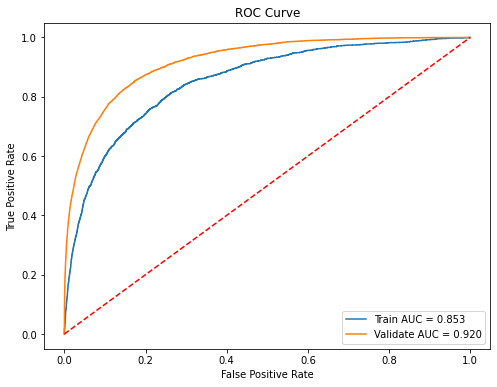

In [58]:
## Usual model statistic and visualisations 
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, _ = roc_curve(X_test['true_label'], X_test['predictions_probability'])
validate_fpr, validate_tpr, _ = roc_curve(y_train, X_train['predictions_probability'])

train_auc = auc(train_fpr, train_tpr)
validate_auc = auc(validate_fpr, validate_tpr)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train AUC = {:.3f}'.format(train_auc))
plt.plot(validate_fpr, validate_tpr, label='Validate AUC = {:.3f}'.format(validate_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Model validation metrics

In [61]:
from sklearn import metrics
XGBMetrics = pd.DataFrame({'Model': 'XGBoost', 
                            'MSE': round(metrics.mean_squared_error(y_test, X_test['predictions_probability'])*100,2),
                            'RMSE' : round(np.sqrt(metrics.mean_squared_error(y_test, X_test['predictions_probability'])*100),2),
                            'MAE' : round(metrics.mean_absolute_error(y_test, X_test['predictions_probability'])*100,2),
                            'MSLE' : round(metrics.mean_squared_log_error(y_test, X_test['predictions_probability'])*100,2), 
                            'RMSLE' : round(np.sqrt(metrics.mean_squared_log_error(y_test, X_test['predictions_probability'])*100),2),
                            'Accuracy Train' : round(bst.score(y_test, X_test['predictions']) * 100,2),
                            'Accuracy Test' : round(bst.score(y_train, X_train['predictions']) * 100,2),
                            'F-Beta Score (β=2)' : round(metrics.fbeta_score(y_test, X_test['predictions'], beta=2)*100,2)},index=[1])

XGBMetrics.to_csv("metrics.csv")

XGBMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,Accuracy Train,Accuracy Test,F-Beta Score (β=2)
1,XGBoost,5.13,2.26,9.73,2.51,1.58,97.68,97.44,21.72


## Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

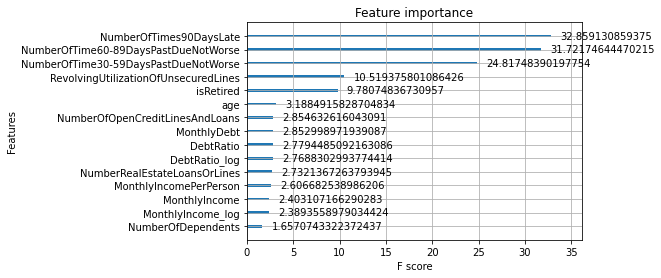

In [39]:
## Feature Importance
from xgboost import plot_importance
bst.get_booster().feature_names = X_train_features.columns.to_list()
plot_importance(bst, importance_type='gain')

## Explainability

# Business strategy / simulations

Although full context behind the data is not provided by Kaggle, the model built by utilising the data can be used in several aspects. 

- Application models
- Behavioural models that are used in a credit card business to decide whether to provide customers with Credit Limit increases or Credit Limit decreases

As it is probably conceptually easier (since key data/information is not provided) to talk about application models, we will discuss potential strategies that can be applied with this model assuming it is used for application decisioning. 

## Strategy curves 

In [49]:
# Create curves of accept rate to default rate

def strategy_curve(dataset,variable):

  observations=[]
  accepts=[]
  defaults=[]
  predictions=[]

  for i in range(0, 1000):
    probability=i/1000
    observations.append(len(dataset))
    accepts.append(len(dataset[dataset[variable] < probability]))
    defaults.append(len(dataset[(dataset[variable]<probability) & (dataset['true_label']==1)]))
    predictions.append(probability)
  
  zipped_list = zip(observations, accepts, defaults, predictions)

  # Create a DataFrame from the zipped list
  summary_df = pd.DataFrame(zipped_list, columns=["observations", "accepts", "defaults", "predictions"])

  summary_df['AcceptRate']=summary_df['accepts']/summary_df['observations']
  summary_df['DefaultRate']=summary_df['defaults']/summary_df['observations']

  return summary_df

summary_df_train=strategy_curve(X_train, 'predictions_probability')
summary_df_test=strategy_curve(X_test, 'predictions_probability')
summary_df_random=strategy_curve(X_train,'random_predictions')




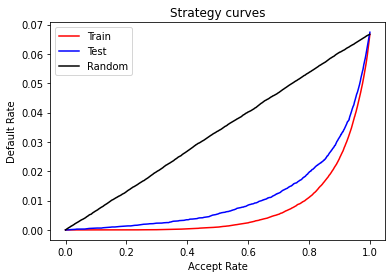

In [72]:
import matplotlib.pyplot as plt
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the data from the first DataFrame
ax.plot(summary_df_train['AcceptRate'], summary_df_train['DefaultRate'], color="red", label="Train")

# Plot the data from the second DataFrame
ax.plot(summary_df_test['AcceptRate'], summary_df_test['DefaultRate'], color="blue", label="Test")

ax.plot(summary_df_random['AcceptRate'], summary_df_random['DefaultRate'], color="black", label="Random")

# Set the title and labels of the plot
ax.set_title("Strategy curves: Accept rate v Default rate tradeoff")
ax.set_xlabel("Accept Rate")
ax.set_ylabel("Default Rate")

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Scenario 1: Using model in decisioning engine for loan
 Optimising for profit / growth

Since it is not provided, . We will illustrate a scenario in which some assumptions are given. 

Profit of loan = Operating Income - Bad Debt costs (PD*EAD*LGD)



Given a simulation of 100k customers, we will simulate what happens if we make some simplifying assumptions. 
- Average loan size of 1000 
- Loss given default is 0.50
- Average EAD is £800
- Operating income (interest from each loan) is roughly around 100


In [50]:
#Profit of loan = 

# 200 - (PD*0.5*800*1000)

def profit_simulation(dataset,operating_income,lgd,ead):
    observations=[]
    accepts=[]
    defaults=[]
    predictions=[]

    for i in range(0, 100):
        probability=i/100
        observations.append(len(dataset))
        accepts.append(len(dataset[dataset['predictions_probability'] < probability]))
        defaults.append(len(dataset[(dataset['predictions_probability']<probability) & (dataset['true_label']==1)]))
        predictions.append(probability)
  
    zipped_list = zip(observations, accepts, defaults, predictions)
    summary_df = pd.DataFrame(zipped_list, columns=["observations", "accepts", "defaults", "predictions"])
    summary_df['AcceptRate']=summary_df['accepts']/summary_df['observations']
    summary_df['DefaultRate']=summary_df['defaults']/summary_df['observations']
    summary_df['Income']=summary_df['accepts']*operating_income
    summary_df['Bad Debt']=summary_df['defaults']*(operating_income-(lgd*ead))
    summary_df['BD_per_customer']=summary_df['Bad Debt']/summary_df['accepts']
    summary_df['Income_per_custoemr']=summary_df['Income']/summary_df['accepts']
    summary_df['Profit']=summary_df['Income']+summary_df['Bad Debt']
    summary_df['Profit_per_customer']=summary_df['Profit']/summary_df['accepts']

    return summary_df

    

profit_summary_df=profit_simulation(X_train, operating_income=100, lgd=0.8, ead=10000)
profit_summary_df.head(10)




,observations,accepts,defaults,predictions,AcceptRate,DefaultRate,Income,Bad Debt,BD_per_customer,Income_per_custoemr,Profit,Profit_per_customer
0,119796,0,0,0.00,0.000000,0.000000,0,-0.0,NaN,NaN,0.0,NaN
1,119796,38586,36,0.01,0.322098,0.000301,3858600,-284400.0,-7.370549,100.0,3574200.0,92.629451
2,119796,61684,166,0.02,0.514909,0.001386,6168400,-1311400.0,-21.259970,100.0,4857000.0,78.740030
3,119796,73655,352,0.03,0.614837,0.002938,7365500,-2780800.0,-37.754395,100.0,4584700.0,62.245605
4,119796,81112,501,0.04,0.677084,0.004182,8111200,-3957900.0,-48.795493,100.0,4153300.0,51.204507
5,119796,86589,668,0.05,0.722804,0.005576,8658900,-5277200.0,-60.945386,100.0,3381700.0,39.054614
6,119796,90755,857,0.06,0.757580,0.007154,9075500,-6770300.0,-74.599747,100.0,2305200.0,25.400253
7,119796,94002,1013,0.07,0.784684,0.008456,9400200,-8002700.0,-85.133295,100.0,1397500.0,14.866705
8,119796,96620,1151,0.08,0.806538,0.009608,9662000,-9092900.0,-94.109915,100.0,569100.0,5.890085
9,119796,98787,1305,0.09,0.824627,0.010894,9878700,-10309500.0,-104.360898,100.0,-430800.0,-4.360898


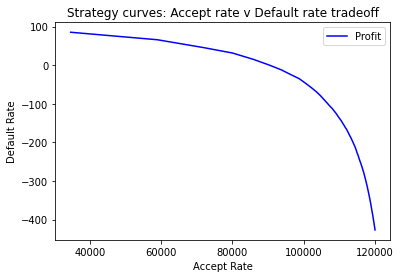

In [38]:
import matplotlib.pyplot as plt
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the data from the first DataFrame
ax.plot(profit_summary_df['accepts'], profit_summary_df['Profit_per_customer'], color="blue", label="Profit")

# Set the title and labels of the plot
ax.set_title("Average profit per customer v accepts")
ax.set_xlabel("Average profit per customer")
ax.set_ylabel("Accept volumes")

# Add a legend
ax.legend()

# Show the plot
plt.show()

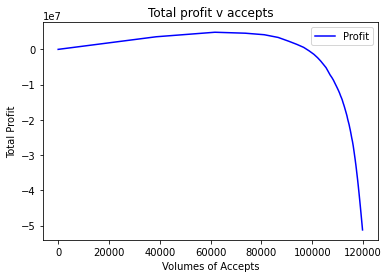

In [51]:
import matplotlib.pyplot as plt
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the data from the first DataFrame
ax.plot(profit_summary_df['accepts'], profit_summary_df['Profit'], color="blue", label="Profit")

# Set the title and labels of the plot
ax.set_title("Total profit v accepts")
ax.set_xlabel("Volumes of Accepts")
ax.set_ylabel("Total Profit")

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Scenario 2 : Using model to set credit card limits for behavioural scorecard

Assume you are using the model to assign limits to everyone. Everyone gets a credit card, but differing limit dependent on the level of risk. 

- £5000 limit if predicted default risk <0.1
- £3000 limit if predicted default risk 0.1<=0.2
- £1000 limit if predicted default risk 0.2<=0.5
- £500 limit otherwise 